## Some issues are found during first approach

- #### size of images are not same
- #### the default opencv load image generated array with small float numbers (looks like normalized)

- #### try to test original cloud fussion on 128x128 pixles, try to create(resize) data in 128x128

### max radar dbz value is 85 (CMA is 75)
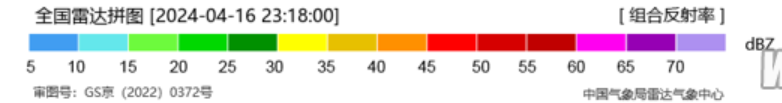

In [4]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 1. Load PNG images into npys
- make sure the images are dividable by num_frames, which are used for trainning for one result

In [58]:
num_frames=4
max_dbz_value = 75
files = glob.glob(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\+All_Stations\az*')
for f in files:
    nms = f.split('\\')
    station_name= nms[-1]
    file_station_folders = glob.glob(f +'\\*')
    for fs in file_station_folders:
        radars=[]
        nms = fs.split('\\')
        station_name_folder = station_name +'_'+nms[-1]
        #print(station_name_folder)
        
        radar_fs = glob.glob(fs +'\\*_radar.png')
        #print(radar_fs)
        # load all images in this folder into a list
        # since training is using 4 images, make it dividable by 4
        d = int(len(radar_fs)/num_frames)
        d1 = d*num_frames
        cc=1
        for img_path in radar_fs:
            # Load the image with pillow
            image = Image.open(img_path)  
            # Resize the image using the BICUBIC filter
            resized_image = image.resize((512,512), Image.BICUBIC)
            img = np.array(resized_image)
            radars.append(img)
            if cc>=d1:
                break
            cc=cc+1
        #Convert data into float32 to match original data type in cloud fusion
        np_day_img = np.array(radars).astype(np.float32)
        
        # normalize the dbz numbers (dbz range is 0 - 85)
        
        np_day_img_norm = np_day_img / max_dbz_value    
        
        #Add one extra dimension to match original data type
        s = np_day_img.shape
        print(s)
        np_day_img_new = np_day_img_norm.reshape(s[0], 1, s[1], s[2])
        
        # save data as npy data
        np.save(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys'+'\\' + station_name_folder + '.npy', np_day_img_new)

(48, 512, 512)
(132, 512, 512)
(24, 512, 512)
(80, 512, 512)
(84, 512, 512)
(116, 512, 512)
(136, 512, 512)
(148, 512, 512)
(24, 512, 512)
(84, 512, 512)
(112, 512, 512)
(132, 512, 512)
(88, 512, 512)
(144, 512, 512)
(24, 512, 512)
(76, 512, 512)
(24, 512, 512)
(108, 512, 512)
(40, 512, 512)
(16, 512, 512)
(104, 512, 512)
(24, 512, 512)
(152, 512, 512)
(68, 512, 512)
(20, 512, 512)
(104, 512, 512)
(44, 512, 512)
(140, 512, 512)
(148, 512, 512)
(68, 512, 512)
(88, 512, 512)
(144, 512, 512)
(64, 512, 512)
(96, 512, 512)
(72, 512, 512)
(40, 512, 512)
(20, 512, 512)
(116, 512, 512)
(20, 512, 512)
(100, 512, 512)
(140, 512, 512)
(24, 512, 512)
(92, 512, 512)
(88, 512, 512)
(20, 512, 512)
(116, 512, 512)
(92, 512, 512)
(116, 512, 512)
(84, 512, 512)
(116, 512, 512)
(92, 512, 512)


### 2. Compare npy data in original dbz and normalized values

### 2.1 Original png images
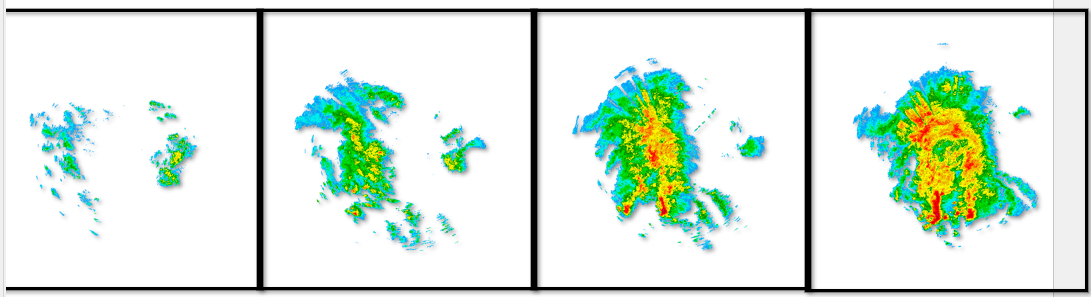

### US Radar color map from metpy

In [37]:
from metpy.plots import ctables
cmap = ctables.registry.get_colortable('NWSReflectivity')

### 2.2 Original dbz vlaue

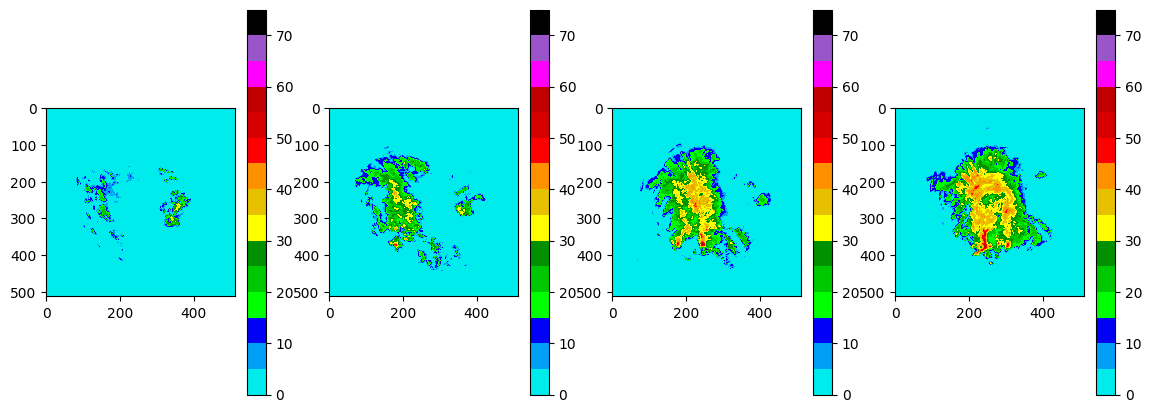

In [56]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\raw_num\az9230_1.npy')
dbz_vmax = 75
fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 4, 1)
plt.imshow(ds[0,0,:,:], cmap = cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 2)
plt.imshow(ds[20,0,:,:], cmap = cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 3)
plt.imshow(ds[35,0,:,:], cmap = cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 4)
plt.imshow(ds[45,0,:,:], cmap = cmap,vmax=dbz_vmax)
plt.colorbar()
plt.show()

### 2.3 Normalized Values

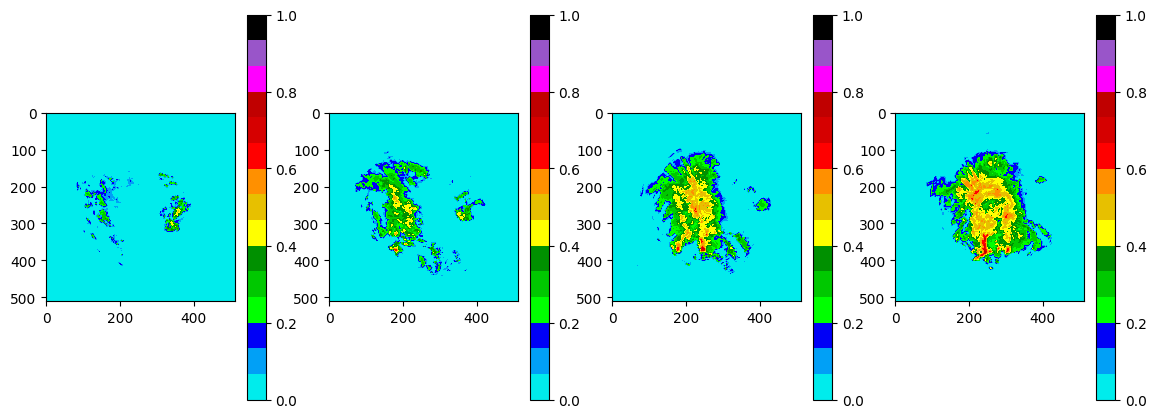

In [57]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9230_1.npy')

fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 4, 1)
plt.imshow(ds[0,0,:,:], cmap = cmap,vmax=1)
plt.colorbar()
fig.add_subplot(1, 4, 2)
plt.imshow(ds[20,0,:,:], cmap = cmap,vmax=1)
plt.colorbar()
fig.add_subplot(1, 4, 3)
plt.imshow(ds[35,0,:,:], cmap = cmap,vmax=1)
plt.colorbar()
fig.add_subplot(1, 4, 4)
plt.imshow(ds[45,0,:,:], cmap = cmap,vmax=1)
plt.colorbar()
plt.show()

### 3. test the npy data before training

In [92]:
# check size on all npy files
files = glob.glob(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\*.npy')
for f in files:
    ds = np.load(f)
    print(ds.shape, ' --- ', f )

(48, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9200_1.npy
(132, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9230_1.npy
(24, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9230_2.npy
(80, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9230_3.npy
(84, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9250_1.npy
(116, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9250_2.npy
(136, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9270_1.npy
(148, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9280_1.npy
(24, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9280_2.npy
(84, 1, 512, 512)  ---  D:\Tommy\++AI\++datasets\jv

### Remove background
- Add mask with condition
- set value to 0 if condition met
- set color map

In [152]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\normalized\az9591_5.npy')
ds.shape

mask = ds < 0.2
ds[mask] = 0  # Set the alpha value to 0 for the pixels to be transparent

In [154]:
import matplotlib.colors as colors
from metpy.plots import ctables

# Get the colormap from metpy
cmap = ctables.registry.get_colortable('NWSReflectivity')

# Create a new colormap with transparency for values of 0
cmap_with_alpha = colors.LinearSegmentedColormap.from_list(
    'NWSReflectivity_with_alpha', 
    [(0, 0, 0, 0), *cmap(np.linspace(0, 1, cmap.N-1))])


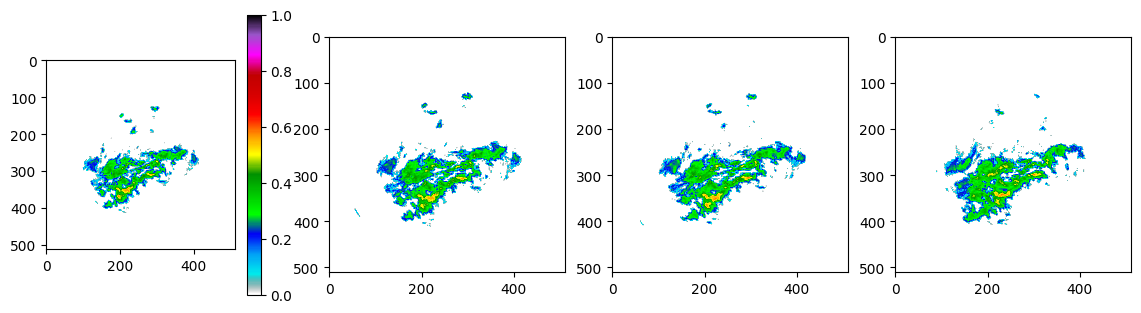

In [157]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds2[0,0,:,:],cmap=cmap_with_alpha, vmax=1)
plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[1,0,:,:],cmap=cmap_with_alpha, vmax=1)
fig.add_subplot(2, 4, 3)
plt.imshow(ds[2,0,:,:],cmap=cmap_with_alpha, vmax=1)
fig.add_subplot(2, 4, 4)
plt.imshow(ds[3,0,:,:],cmap=cmap_with_alpha, vmax=1)

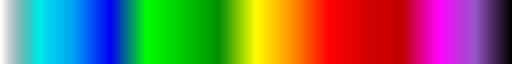

In [159]:
cm1 = colors.LinearSegmentedColormap.from_list('NWSReflectivity_with_alpha',[(0, 0, 0, 0), *cmap(np.linspace(0, 1, cmap.N-1))])
cm1

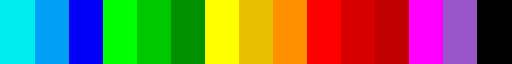

In [160]:
cmap

### 4. View the log images during training

In [67]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\pastframes_1.npy')
ds.shape

(8, 3, 128, 128)

In [68]:
ds1 = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\samples_1.npy')
ds1.shape

(8, 1, 128, 128)

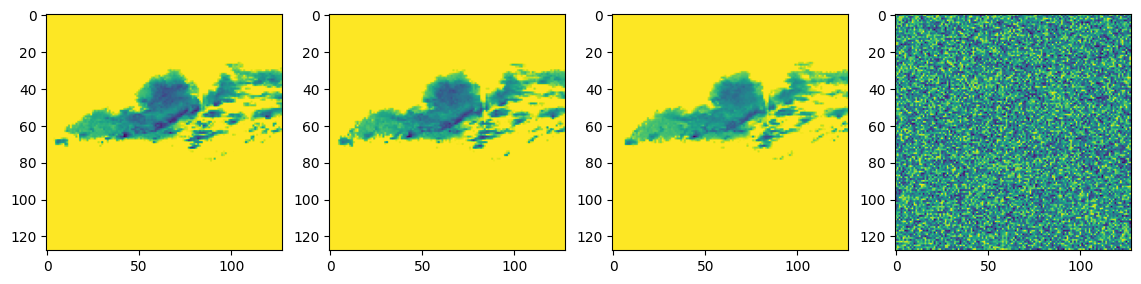

In [69]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[0,0,:,:])
#plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[0,1,:,:])
fig.add_subplot(2, 4, 3)
plt.imshow(ds[0,2,:,:])
fig.add_subplot(2, 4, 4)
plt.imshow(ds1[0,0,:,:])

In [71]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\pastframes_25.npy')
ds1 = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\samples_25.npy')


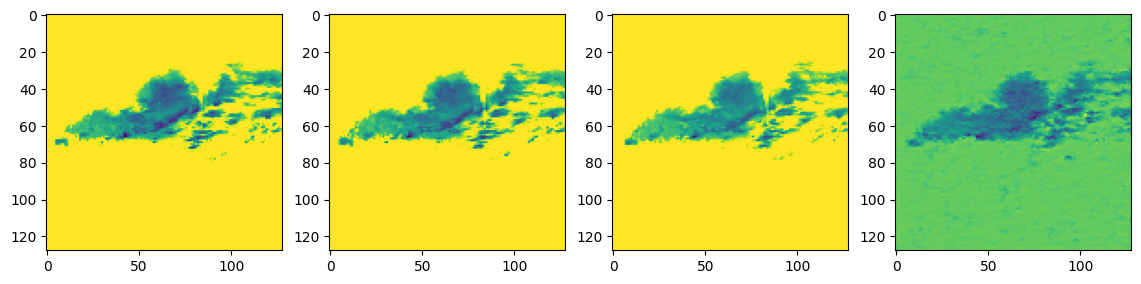

In [72]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[0,0,:,:])
#plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[0,1,:,:])
fig.add_subplot(2, 4, 3)
plt.imshow(ds[0,2,:,:])
fig.add_subplot(2, 4, 4)
plt.imshow(ds1[0,0,:,:])

In [163]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\pastframes_49.npy')
ds1 = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\cloud_diffusion_code\training_process_out\out\samples_49.npy')

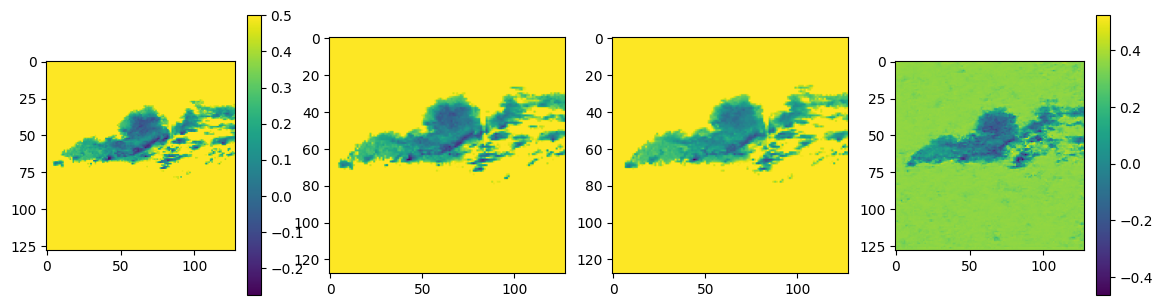

In [164]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[0,0,:,:])
plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[0,1,:,:])
fig.add_subplot(2, 4, 3)
plt.imshow(ds[0,2,:,:])
fig.add_subplot(2, 4, 4)
plt.imshow(ds1[0,0,:,:])
plt.colorbar()

In [165]:
from metpy.plots import ctables
cmap = ctables.registry.get_colortable('NWSReflectivity')

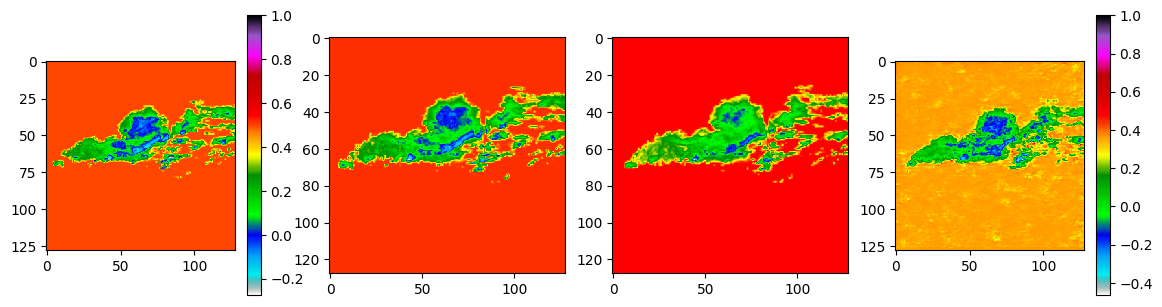

In [166]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[0,0,:,:],cmap=cmap_with_alpha,vmax=1)
plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[0,1,:,:],cmap=cmap_with_alpha,vmax=1)
fig.add_subplot(2, 4, 3)
plt.imshow(ds[0,2,:,:],cmap=cmap_with_alpha,vmax=1)
fig.add_subplot(2, 4, 4)
plt.imshow(ds1[0,0,:,:],cmap=cmap_with_alpha,vmax=1)
plt.colorbar()

### 5. Inference
- `python inference128.py  --future_frames 5 --num_random_experiments 2`
- Loading model from: /root/cloud_diffusion/artifacts/esezp3jh_unet_small:v0/esezp3jh_unet_small.pth
- 6gb GPU memory
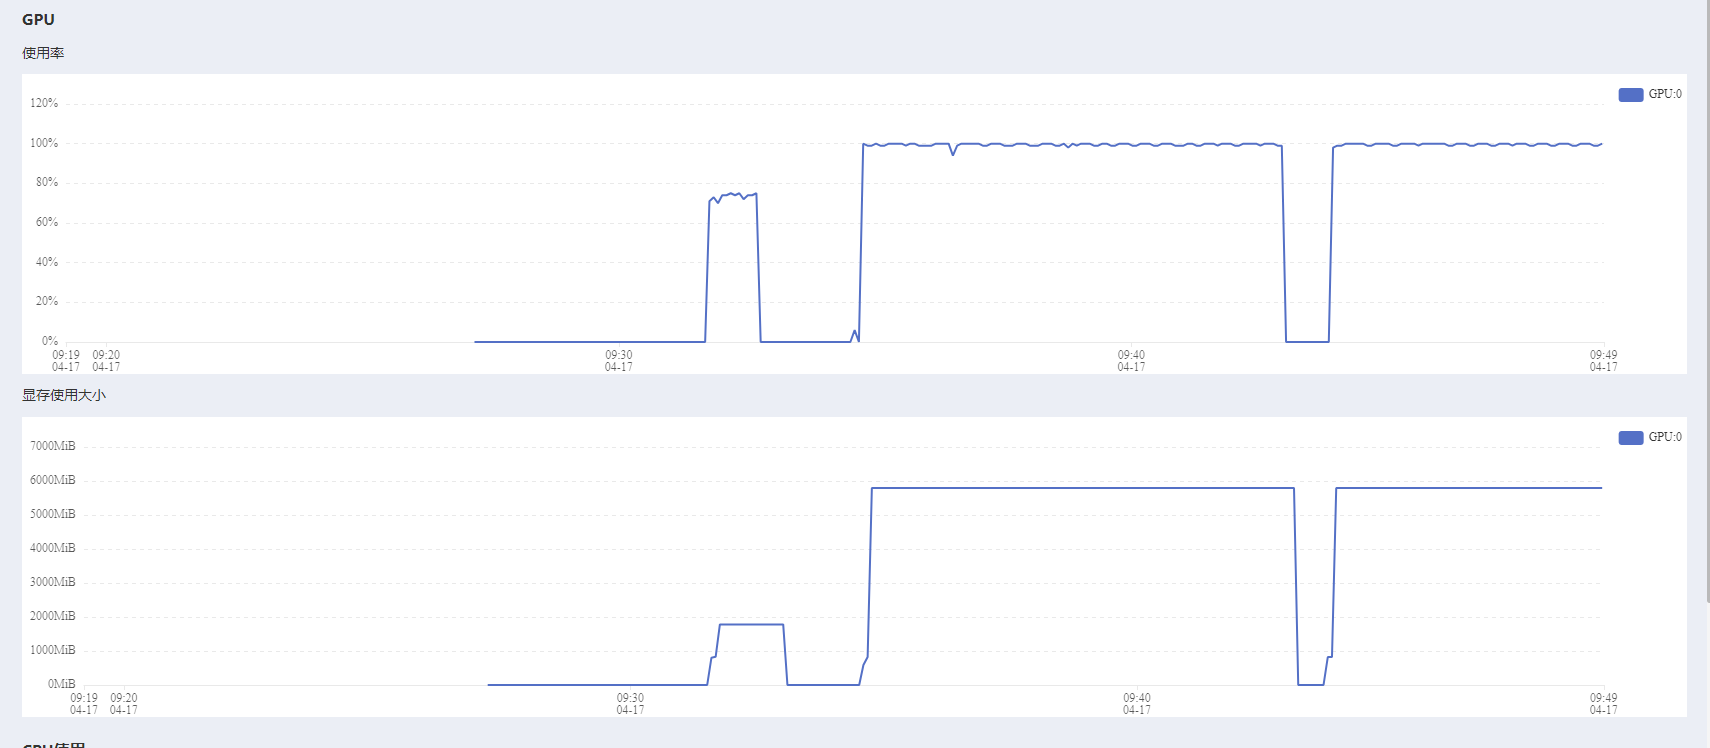

### 5.1 Inference results

In [176]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\forecasts\128-50-radar\forecastframes_0_0.npy')
ds.shape

(9, 128, 128)

In [177]:
from metpy.plots import ctables
cmap = ctables.registry.get_colortable('NWSReflectivity')

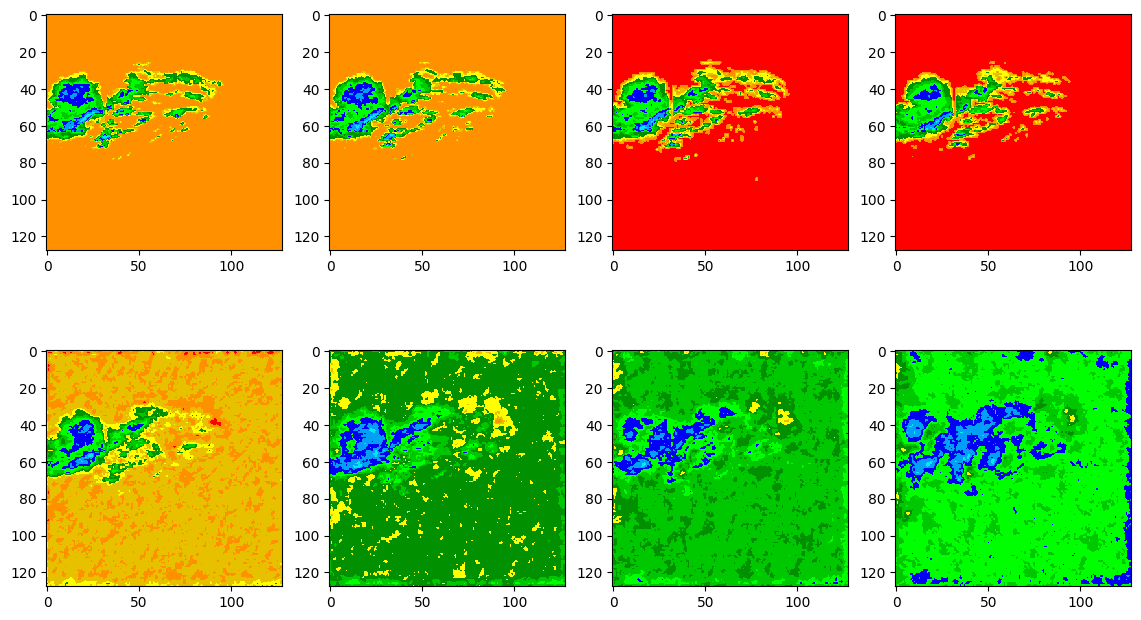

In [178]:
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[0,:,:],cmap=cmap,vmax=1)
#plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[1,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 3)
plt.imshow(ds[2,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 4)
plt.imshow(ds[3,:,:],cmap=cmap,vmax=1)
#plt.colorbar()
fig.add_subplot(2, 4, 5)
plt.imshow(ds[4,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 6)
plt.imshow(ds[5,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 7)
plt.imshow(ds[6,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 8)
plt.imshow(ds[7,:,:],cmap=cmap,vmax=1)

In [198]:
import metpy.plots.ctables as ctables

# Get the NWSReflectivity colormap
cmap = ctables.registry.get_colortable('NWSReflectivity')

# Get the RGB values of the colormap
colors_rgb = [cmap(i) for i in range(cmap.N)]

# Print the RGB values
for i, rgb in enumerate(colors_rgb):
    print(f"Color {i+1}: {rgb}")

Color 1: (0.0, 0.9254901960784314, 0.9254901960784314, 1.0)
Color 2: (0.00392156862745098, 0.6274509803921569, 0.9647058823529412, 1.0)
Color 3: (0.0, 0.0, 0.9647058823529412, 1.0)
Color 4: (0.0, 1.0, 0.0, 1.0)
Color 5: (0.0, 0.7843137254901961, 0.0, 1.0)
Color 6: (0.0, 0.5647058823529412, 0.0, 1.0)
Color 7: (1.0, 1.0, 0.0, 1.0)
Color 8: (0.9058823529411765, 0.7529411764705882, 0.0, 1.0)
Color 9: (1.0, 0.5647058823529412, 0.0, 1.0)
Color 10: (1.0, 0.0, 0.0, 1.0)
Color 11: (0.8392156862745098, 0.0, 0.0, 1.0)
Color 12: (0.7529411764705882, 0.0, 0.0, 1.0)
Color 13: (1.0, 0.0, 1.0, 1.0)
Color 14: (0.6, 0.3333333333333333, 0.788235294117647, 1.0)
Color 15: (0.0, 0.0, 0.0, 1.0)


In [238]:
cmap.colors

[(0.0, 0.9254901960784314, 0.9254901960784314),
 (0.00392156862745098, 0.6274509803921569, 0.9647058823529412),
 (0.0, 0.0, 0.9647058823529412),
 (0.0, 1.0, 0.0),
 (0.0, 0.7843137254901961, 0.0),
 (0.0, 0.5647058823529412, 0.0),
 (1.0, 1.0, 0.0),
 (0.9058823529411765, 0.7529411764705882, 0.0),
 (1.0, 0.5647058823529412, 0.0),
 (1.0, 0.0, 0.0),
 (0.8392156862745098, 0.0, 0.0),
 (0.7529411764705882, 0.0, 0.0),
 (1.0, 0.0, 1.0),
 (0.6, 0.3333333333333333, 0.788235294117647),
 (0.0, 0.0, 0.0)]

In [228]:
import metpy.plots.ctables as ctables

# Get the NWSReflectivity colormap
cmap = ctables.registry.get_colortable('NWSReflectivity')

# Get the RGB values of the colormap
colors_rgb = [cmap(i) for i in range(cmap.N)]

# Print the RGB values
for i, rgb in enumerate(colors_rgb):
    tt = rgb[0]*255,rgb[1]*255,rgb[2]*255
    #print(f"Color {i+1}: {rgb} --- {tt}")
    print(f"Color {i+1}:  {tt}")

Color 1:  (0.0, 236.0, 236.0)
Color 2:  (1.0, 160.0, 246.0)
Color 3:  (0.0, 0.0, 246.0)
Color 4:  (0.0, 255.0, 0.0)
Color 5:  (0.0, 200.0, 0.0)
Color 6:  (0.0, 144.0, 0.0)
Color 7:  (255.0, 255.0, 0.0)
Color 8:  (231.0, 192.0, 0.0)
Color 9:  (255.0, 144.0, 0.0)
Color 10:  (255.0, 0.0, 0.0)
Color 11:  (214.0, 0.0, 0.0)
Color 12:  (192.0, 0.0, 0.0)
Color 13:  (255.0, 0.0, 255.0)
Color 14:  (153.0, 85.0, 201.0)
Color 15:  (0.0, 0.0, 0.0)


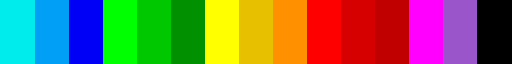

CMA Colors:

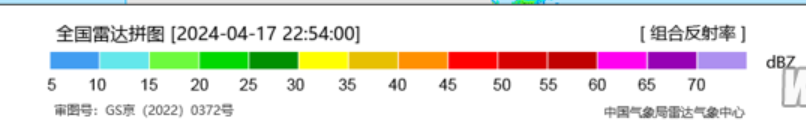

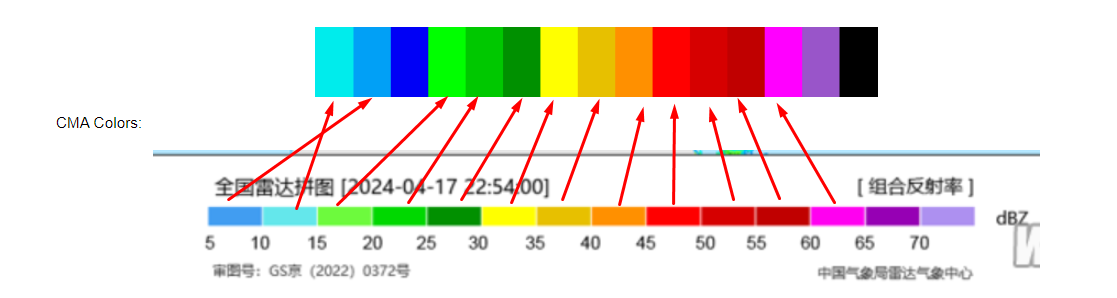

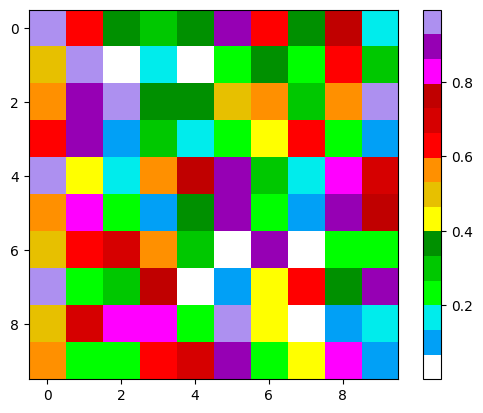

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define your custom colors
colors = [
    (255,255,255),    #0
    (1.0, 160.0, 246.0),    # 5
    (0.0, 236.0, 236.0),    # 10
    (0.0, 255.0, 0.0),      # 15
    (0.0, 200.0, 0.0),      #20
    (0.0, 144.0, 0.0),      #25
    (255.0, 255.0, 0.0),    #30
    (231.0, 192.0, 0.0),    #35
    (255.0, 144.0, 0.0),    #40
    (255.0, 0.0, 0.0),      #45
    (214.0, 0.0, 0.0),      #50
    (192.0, 0.0, 0.0),      #55
    (255.0, 0.0, 255.0),    #60
    (150, 0, 180),          #65
    (173, 144, 240)         #70
]

# Convert RGB values to a range of [0, 1]
colors_normalized = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# Create a ListedColormap object
cma_cmap = ListedColormap(colors_normalized)

# Generate sample data for image
data = np.random.rand(10, 10)

# Plot the image with the custom colormap
plt.imshow(data, cmap=cma_cmap)
plt.colorbar()  # Add a color bar to show the mapping
plt.show()

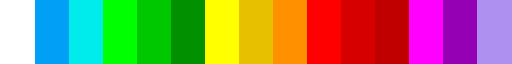

In [235]:
cma_cmap

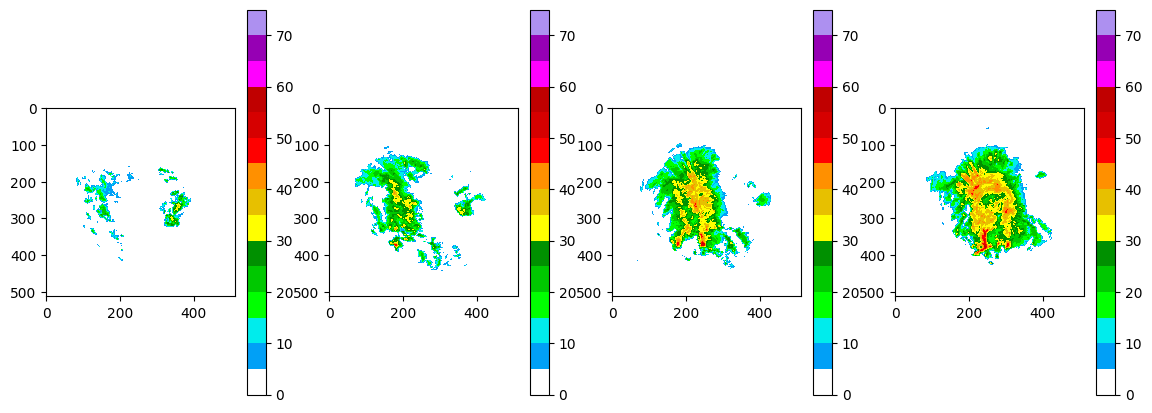

In [237]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\npys\raw_num\az9230_1.npy')
dbz_vmax = 75
fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 4, 1)
plt.imshow(ds[0,0,:,:], cmap = cma_cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 2)
plt.imshow(ds[20,0,:,:], cmap = cma_cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 3)
plt.imshow(ds[35,0,:,:], cmap = cma_cmap,vmax=dbz_vmax)
plt.colorbar()
fig.add_subplot(1, 4, 4)
plt.imshow(ds[45,0,:,:], cmap = cma_cmap,vmax=dbz_vmax)
plt.colorbar()
plt.show()

###  Inference Results

In [243]:
ds = np.load(r'D:\Tommy\++AI\++datasets\jv_radar\+SinglesiteRadars\forecasts\128-10-radar-6frames\forecastframes_1.npy')
ds.shape

(8, 9, 128, 128)

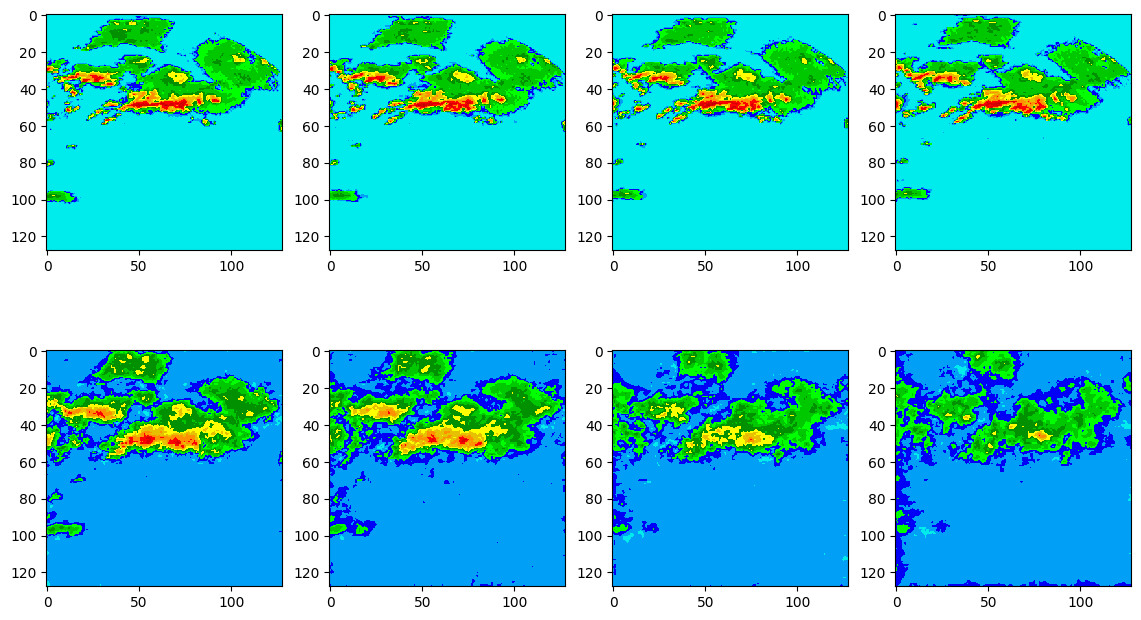

In [244]:
num_sample=2
fig = plt.figure(figsize=(14, 8))
fig.add_subplot(2, 4, 1)
plt.imshow(ds[num_sample,0,:,:],cmap=cmap,vmax=1)
#plt.colorbar()
fig.add_subplot(2, 4, 2)
plt.imshow(ds[num_sample,1,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 3)
plt.imshow(ds[num_sample,2,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 4)
plt.imshow(ds[num_sample,3,:,:],cmap=cmap,vmax=1)
#plt.colorbar()
fig.add_subplot(2, 4, 5)
plt.imshow(ds[num_sample,4,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 6)
plt.imshow(ds[num_sample,5,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 7)
plt.imshow(ds[num_sample,6,:,:],cmap=cmap,vmax=1)
fig.add_subplot(2, 4, 8)
plt.imshow(ds[num_sample,7,:,:],cmap=cmap,vmax=1)